Generation = 1
Fitness    = 10.23800309127023
Change     = 10.23800309127023
Generation = 2
Fitness    = 11.584079349983135
Change     = 1.3460762587129054
Generation = 3
Fitness    = 14.278496641977162
Change     = 2.694417291994027
Generation = 4
Fitness    = 38.42059728236
Change     = 24.142100640382836
Generation = 5
Fitness    = 38.42059728236
Change     = 0.0
Generation = 6
Fitness    = 38.42059728236
Change     = 0.0
Generation = 7
Fitness    = 38.42059728236
Change     = 0.0
Generation = 8
Fitness    = 38.42059728236
Change     = 0.0
Generation = 9
Fitness    = 38.42059728236
Change     = 0.0
Generation = 10
Fitness    = 38.42059728236
Change     = 0.0
Generation = 11
Fitness    = 38.42059728236
Change     = 0.0
Generation = 12
Fitness    = 38.42059728236
Change     = 0.0
Generation = 13
Fitness    = 38.42059728236
Change     = 0.0
Generation = 14
Fitness    = 38.42059728236
Change     = 0.0
Generation = 15
Fitness    = 38.42059728236
Change     = 0.0
Generation = 16
Fitness  

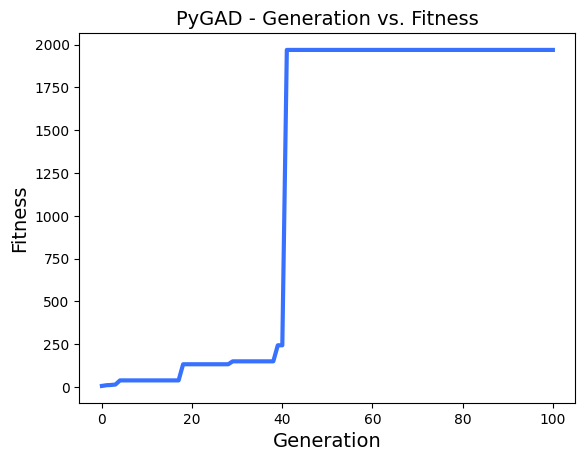

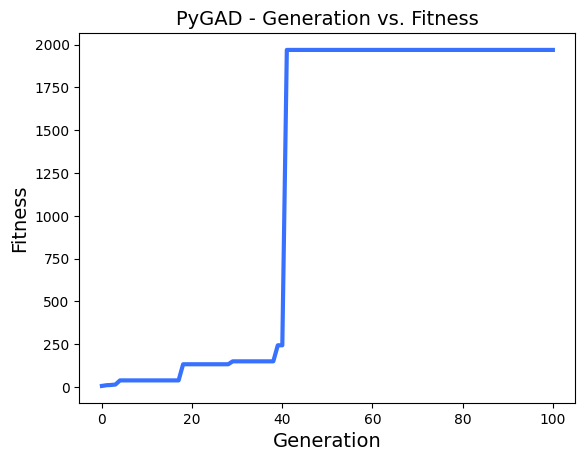

In [2]:
import numpy as np
import pygad

# Данные акций
stocks = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'FACEBOOK']
expected_returns = [0,1, 0.15, 0.12, 0.08, 0.11]  # Ожидаемая доходность
risks = [0.2, 0.18, 0.15, 0.25, 0.22]  # Риск

# Целевая ожидаемая доходность и максимальный риск
target_return = 0.3
max_risk = 0.25

# Функция оценки приспособленности

def fitness_func(ga_instance, solution, solution_idx):
    stocks_returns = np.array(expected_returns)[:len(solution)]
    selected_stocks = np.array(stocks_returns) * np.array(solution)
    returns = np.array(expected_returns)[:len(solution)] * np.array(solution)
    risks_selected = np.array(risks)[:len(solution)] * np.array(solution)
    portfolio_return = np.sum(returns)
    portfolio_risk = np.sum(risks_selected)
    # Чем ближе портфель к целевой доходности и ниже максимального риска, тем лучше приспособленность
    fitness = 1.0 / (np.abs(portfolio_return - target_return) + 0.0001) - portfolio_risk / max_risk
    return fitness


# Параметры генетического алгоритма
num_generations = 100
num_parents_mating = 20
sol_per_pop = 20
mutation_prob = 0.5
num_genes = len(stocks)

last_fitness = 0

def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       mutation_percent_genes=mutation_prob,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()